In [4]:
import cv2
import tensorflow as tf
import numpy as np
import PIL
import pathlib


import matplotlib.image as mpimg

from PIL import Image
from tensorflow import keras #used to build the model
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from matplotlib import pyplot as plt

In [2]:
path = pathlib.Path('./asl_dataset')
data_training = tf.keras.preprocessing.image_dataset_from_directory(path.name, 
                                                                    validation_split = 0.2, 
                                                                    subset="training",
                                                                    seed=123,
                                                                    image_size=(180,180),
                                                                    batch_size=32, 
                                                                    )

data_validation = tf.keras.preprocessing.image_dataset_from_directory(path.name, 
                                                                    validation_split = 0.2, 
                                                                    subset="validation",
                                                                    seed=123,
                                                                    image_size=(180,180),
                                                                    batch_size=32,
                                                                    )

#labels='inferred'

Found 2515 files belonging to 36 classes.
Using 2012 files for training.
Found 2515 files belonging to 36 classes.
Using 503 files for validation.


In [3]:
class_names = data_training.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [4]:
type(data_training)
data_training

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

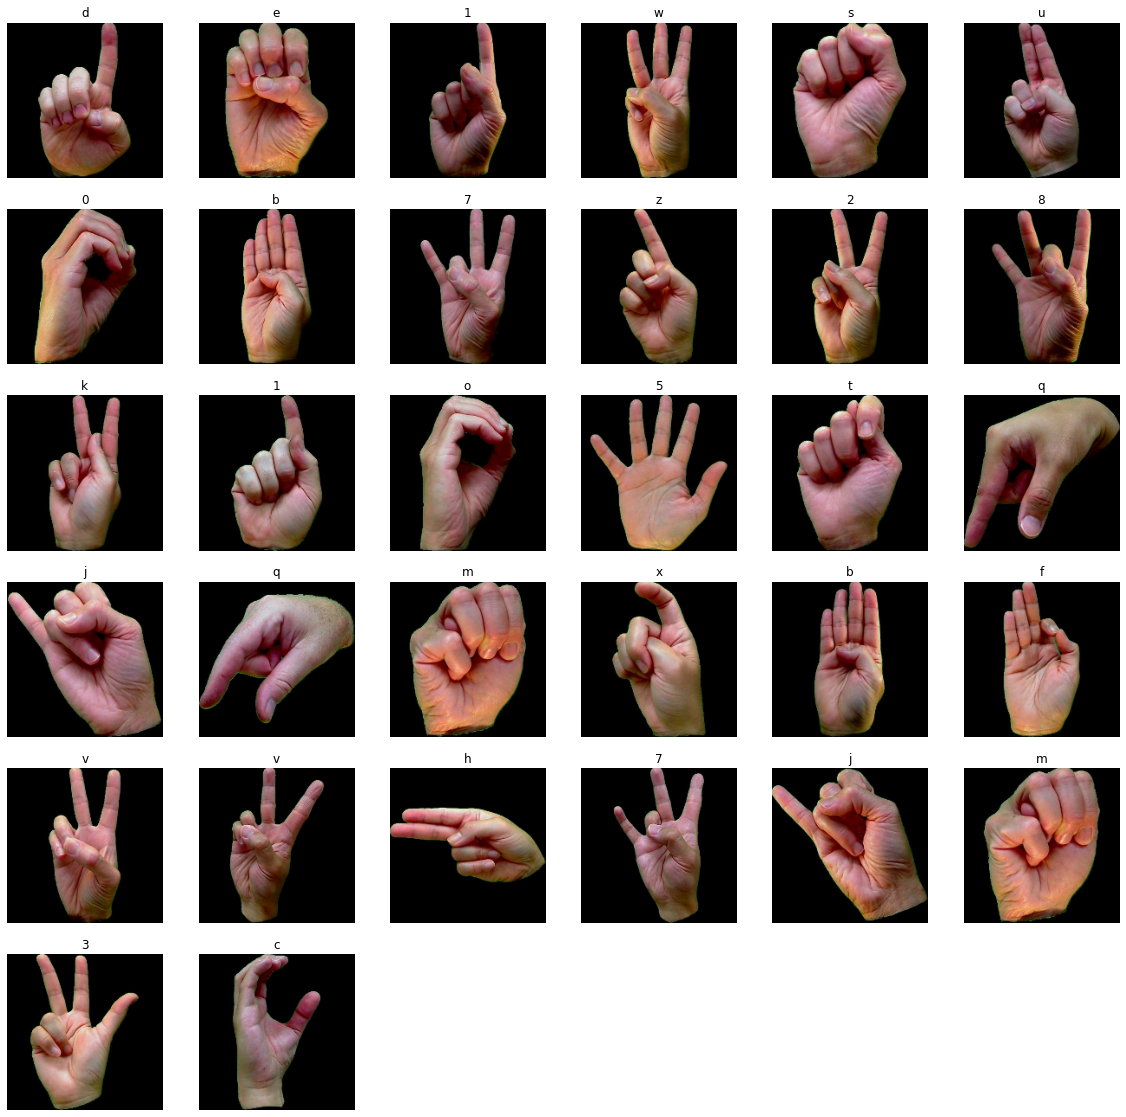

In [5]:
plt.figure(figsize=(20, 20))
class_names = data_training.class_names
for images, labels in data_training.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
for image_batch, labels_batch in data_training:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [7]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = data_training.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

In [8]:
data_augmentation = keras.Sequential(
[
layers.experimental.preprocessing.RandomFlip("horizontal",
input_shape=(180,180,3)),
layers.experimental.preprocessing.RandomRotation(0.1),
layers.experimental.preprocessing.RandomZoom(0.1),
]
)

In [9]:
#model
num_classes = 36 
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2), 
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [10]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])



In [11]:
# model.summary()

In [12]:
history = model.fit(
data_training,
validation_data=data_validation,
epochs=5
)

# TA -- Deep learning base image recognition from Week 10

Epoch 1/5
63/63 [==============================] - 30s 448ms/step - loss: 2.7494 - accuracy: 0.2366 - val_loss: 1.5838 - val_accuracy: 0.5487
Epoch 2/5
63/63 [==============================] - 26s 410ms/step - loss: 1.4016 - accuracy: 0.5557 - val_loss: 0.8276 - val_accuracy: 0.7316
Epoch 3/5
63/63 [==============================] - 25s 403ms/step - loss: 0.9395 - accuracy: 0.6938 - val_loss: 0.6126 - val_accuracy: 0.7952
Epoch 4/5
63/63 [==============================] - 25s 403ms/step - loss: 0.7116 - accuracy: 0.7570 - val_loss: 0.5264 - val_accuracy: 0.8171
Epoch 5/5
63/63 [==============================] - 26s 407ms/step - loss: 0.5863 - accuracy: 0.7962 - val_loss: 0.3553 - val_accuracy: 0.8728


In [1]:
# serialize model to JSON
#model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    model.save_weights("model.h5")
print("Saved model to disk")



# TODO: keras model frozen inference graph and pbtxt file --- used to convert the keras model to be used in cv2.dnn


#https://towardsdatascience.com/freezing-a-keras-model-c2e26cb84a38
#https://machinelearningmastery.com/save-load-keras-deep-learning-models/

#print(model.weights)







SyntaxError: invalid syntax (Temp/ipykernel_17692/3712771069.py, line 5)

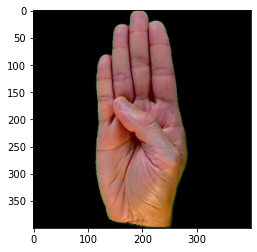

[[ 0.39795795 -2.2573447  -1.6744723  -3.4149866   0.9282147  -2.2817886
   0.57548064 -1.3363986  -1.4943365  -3.27553    -0.7624841   9.515851
  -3.6101558  -0.25192752 -0.9894896   2.674454   -7.1070123  -3.2195315
   0.5153155  -2.5698555   1.9459838  -3.5197418  -1.141161    0.6638871
  -4.017589   -3.4979618   0.3474545  -0.24484259 -2.7913425  -3.3483682
   5.012219    0.02117167  0.79094625 -0.56998384 -6.081153   -3.104887  ]]
tf.Tensor(
[1.08168169e-04 7.60180046e-06 1.36161625e-05 2.38868438e-06
 1.83817669e-04 7.41822987e-06 1.29180393e-04 1.90931805e-05
 1.63037184e-05 2.74614877e-06 3.38942300e-05 9.86166358e-01
 1.96515930e-06 5.64752190e-05 2.70108812e-05 1.05382642e-03
 5.95294942e-08 2.90431717e-06 1.21637386e-04 5.56153236e-06
 5.08626108e-04 2.15111731e-06 2.32096572e-05 1.41120821e-04
 1.30753108e-06 2.19848243e-06 1.02840932e-04 5.68767609e-05
 4.45660180e-06 2.55323380e-06 1.09156007e-02 7.42101474e-05
 1.60240423e-04 4.10892208e-05 1.66057092e-07 3.25711653e-06]

In [30]:
#img = tf.keras.utils.get_file(fname="_Test_img", origin="*/*")

image = r'C:\Users\XCannibal\Desktop\AI_Project\Artifical_Intelligence_Project\Test_two.jpeg'



from PIL import Image
 
# Giving The Original image Directory
# Specified
#Original_Image = Image.open("./Test_two.jpeg")
 
# Rotate Image By 180 Degree
#rotated_image = Original_Image.rotate(270)
 

#img = Image(image)
#rotated = img.rotate(90)
img = mpimg.imread(image)
plt.imshow(img)
plt.show()

    
im = Image.fromarray(img, 'RGB')
im = im.resize((180,180))
img_array = np.array(im)
img_array = tf.expand_dims(img_array,0)
prediction = model.predict(img_array)


print(prediction)

score = tf.nn.softmax(prediction[0])

print(score)

print("This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [10]:
#open_cv_model = cv2.dnn.readNet(, framework='TensorFlow')
#open_cv_model = cv2.dnn.readNetFromTensorflow(model[model.weights])

#class_names


# web cam
cam = cv2.VideoCapture(0)
while(True):
    ret, frame = cam.read() #play the video
    
    #this doesn't actually recognize the gestures being provide from a webcam.
    
   # https://stackoverflow.com/questions/66874821/how-to-use-opencv-videocapture-with-saved-keras-model
   # https://stackoverflow.com/questions/68776790/model-predict-classes-is-deprecated-what-to-use-instead
   # https://learnopencv.com/deep-learning-with-opencvs-dnn-module-a-definitive-guide/ 
   # https://www.geeksforgeeks.org/python-opencv-capture-video-from-camera/
    
    
    # Let's load a simple image with 3 black squares 

    # Find Canny edges 

    
    #Flips the frame
    frame = cv2.flip(frame,1)
    #edges = cv2.Canny(frame, 180,80)
    #cv2.imshow("Edge Detected Image", edges)   
    
    edged = cv2.Canny(frame, 180, 180) 
    contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
    cv2.imshow('Canny Edges After Contouring', edged)  
    cv2.drawContours(frame, contours, -1, (0, 255, 0), 3) 
    cv2.imshow('Contours', frame) 
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cam.release() # stops the video
cv2.destroyAllWindows()
